#  Identificar técnicas avanzadas de aprendizaje automático y reconocimiento de patrones según el objetivo del análisis.

## Algoritmo de agrupamiento no supervisado K-Means


<a href="https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-Python">
  <img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" alt="Kaggle" width="120"/>
</a>




## Índice

- Importar las librerìas de Python necesarias para realizar la exploración usando Jupyter lab
- Cargas los datos del caso propuesto
- Obtener estadísticas de cada una de las variables
- Identificar datos nulos o datos perdidos
- Obtener una distribución de datos de cada una de las variables
- Realizar visualizón de relación entre las múltiples variables del dataset
- Realizar una matriz de correlación de las variables

> En esta actividad, se llevará a cabo una exploración
> inicial de datos del problema y, de esta forma, comprender
> los datos que se van a utilizar.
> El objetivo es examinar, explicar, resumir y visualizar
> los datos en cuestión, además de tener una primera
> aproximación de identificación patrones en los datos del problema.


### Importar las librerías de Python necesarias para realizar la exploración usando Jupyter lab

In [18]:
import pandas as pd  # para manejar datos
import matplotlib.pyplot as plt  # para graficar
import seaborn as sns  # para graficar
import kagglehub  # para importar CSV
import os

### Cargar los datos del caso propuesto

In [7]:
# --- Descargamos el dataset de Kaggle y obtenemos la ruta local ---

ruta_directorio = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Ruta al directorio del dataset:", ruta_directorio)

# Ruta del archivo CSV
# Construimos la ruta completa al archivo 'Mall_Customers.csv'.
ruta_csv = os.path.join(ruta_directorio, 'Mall_Customers.csv')

df_clientes = pd.read_csv(ruta_csv)

# --- Se muestran las primeras 5 filas del dataset
print("Primeras 5 filas del dataset:")
display(df_clientes.head())

Ruta al directorio del dataset: /home/user/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1
Primeras 5 filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Identificar los tipos de datos
### Tipos de datos que idenfico

| Dtype  | Descripción                                                        |
|--------|--------------------------------------------------------------------|
| object | String: Gender                                                     |
| int64  | Enteros: CustomerID, Age, Annual Income(k$), Spendig Score (1-100) |

Utilizo la funcion ```
.info()
``` para de la libreria ```
pandas
``` 

In [17]:
# --- Vista para los tipos de datos de las variables ---
print("\nInformación general del dataset:")
df_clientes.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Obtener estadísticas descriptivas de las variables

Para explorar de manera rápidamente la estadística de los datos, utilizo la función
``
.describe()``

### Descripción

- **count**: el número total de los registros no nulos.
- **mean**: el valor promedio (la media aritmética).
- **std**: la desviación estándar. **Nota**: *un número bajo indica que los datos están agrupados alrededor de la media, mientra que un número alto indica que están más disperos.*
- **min**: el valor más pequeño encontrado en la columna.
- **25%**: el primer cuartil (Q1). El 25% de los datos son menores que este valor.
- **50%**: la mediana (o segundo cuartil, Q2). La mitad de los datos están por debajo de este valor.
- **75%**: el tercer cuartil (Q3). El 75% de los datos son menores que este valor.
- **max**: el valor más alto de la columna.

**Nota**: la funcion ``
.describe()`` solo analiza las columnas que contienen números. Entonces en este dataset, solo arroja resultados estadísticos para: **Age**, **Annual Income**, **Spendig Score**

In [8]:
# --- Estadísticas de las variables
df_clientes.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Identificar datos nulos

Utilizo la función ``
.isnull()`` y la función ``
.sum()`` para sumarlos.

### ¿Cómo funciona?
La función .isnull() revisa cada celda del DataFrame. Devuelve True si la celda está vacía, osea nula y False si coniene un valor.
Luego la función .sum() cuenta todos los True de cada columna (ya que True equivale a 1 y False equivale a 0)


In [9]:
# --- Obener el total de los valore null---
df_clientes.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Obtener una distribución de datos de cada una de las variables

Para las variables que contienen datos numericos, utilizo el histograma. Este tipo de gráfico, muestra con que frecuencia aparecen ciertos rangos de valores y me permite ver donde se concentran los valores.
Para este proceso, voy a utilizar la libreria ``
seaborn``

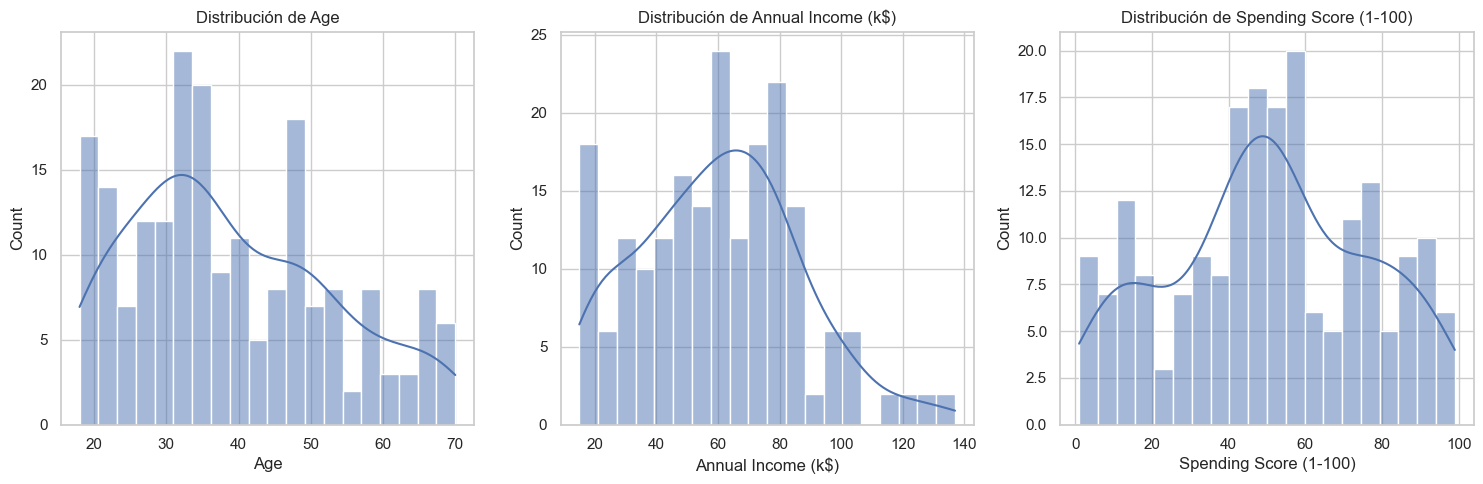

In [19]:
# Estilo para los graficos
sns.set_theme(style="whitegrid")

# Lienzo para los gráficos
plt.figure(figsize=(15, 5))

# Lista de columnas numéricas (excluyo CustomerID por no ser una medida)
columnas_numericas = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Se crea grafico tipo histograma para variable numérica
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_clientes[col], kde=True, bins=20)
    plt.title(f'Distribución de {col}')

# Se muestran los gráficos
plt.tight_layout()
plt.show()

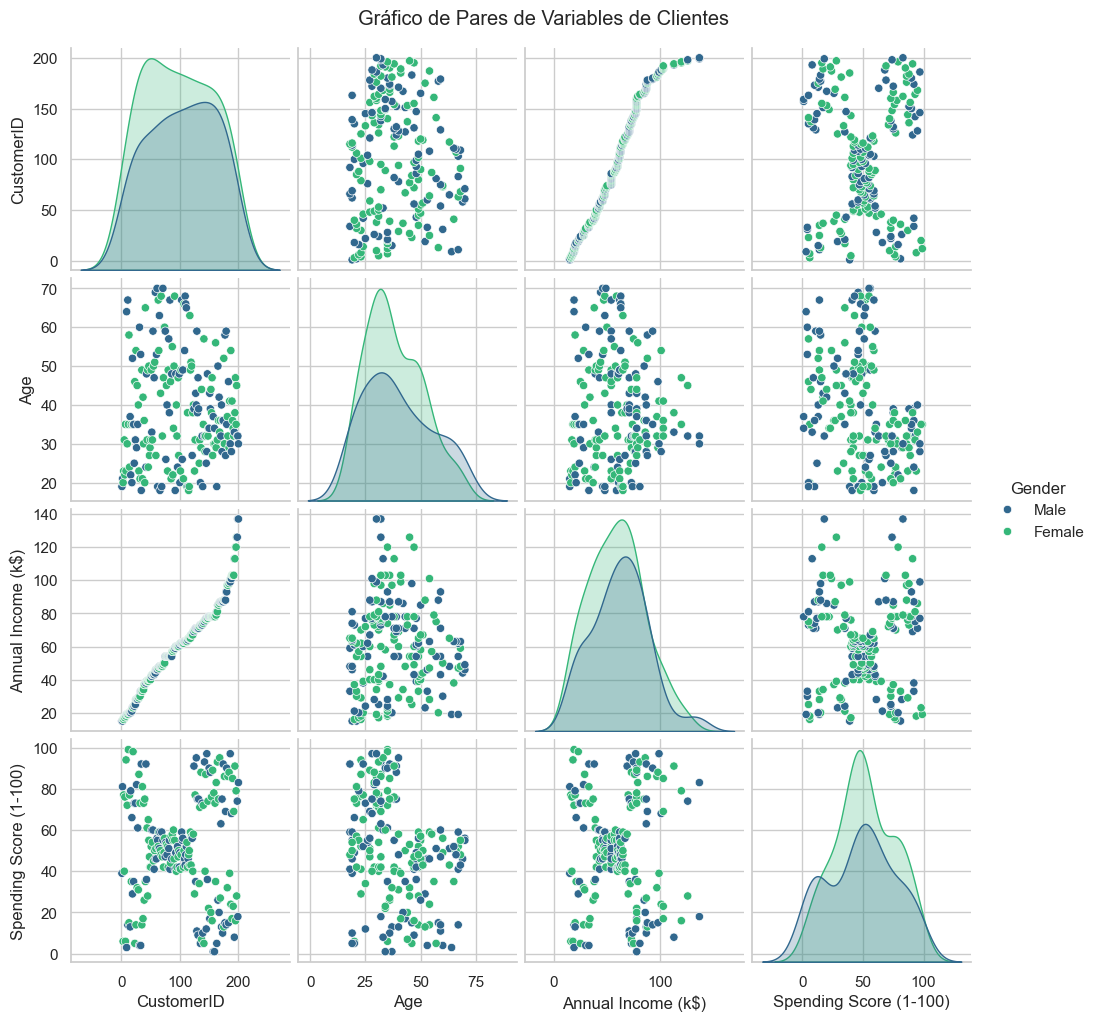

In [20]:
# Creamos un gráfico de pares para ver la relación entre las variables numéricas
# 'hue="Gender"' coloreará los puntos según el género del cliente
sns.pairplot(df_clientes, hue="Gender", palette='viridis')
plt.suptitle('Gráfico de Pares de Variables de Clientes', y=1.02) # Título
plt.show()

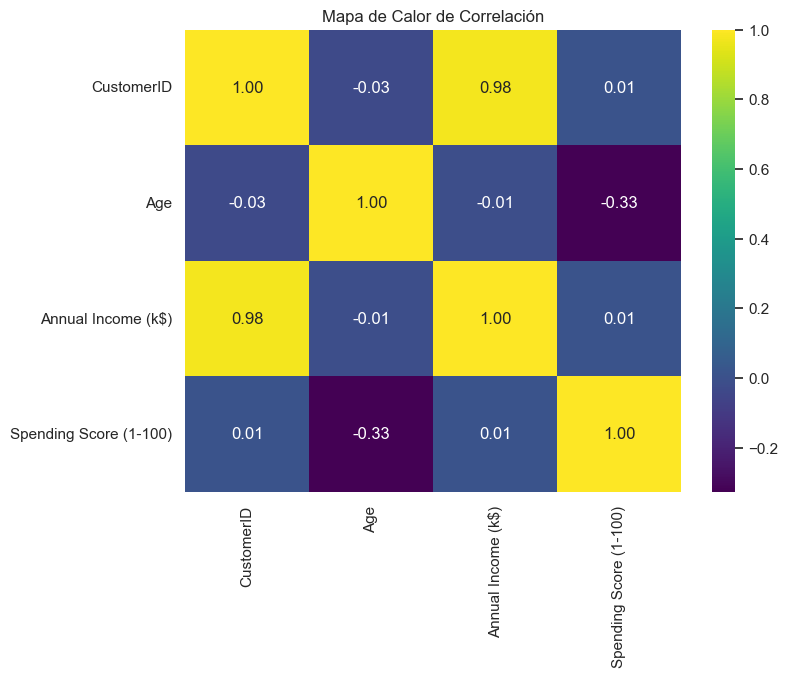

In [21]:
# 1. Calcular la matriz de correlación
correlacion = df_clientes.corr(numeric_only=True)

# 2. Dibujar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()